Importing the necessary library 

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

 Reading the csv files

In [135]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
variableDefined = pd.read_csv('VariableDefinitions.csv')

**EXPLORATORY DATA ANALYSIS**

In [3]:
#checking for the columns of the train and test data set
#checking the data type of the train and test data set
#checking for the information of the train and test data set
#checking for the decription of the test and test data set 

In [136]:
#checking for duplicate and treating duplicate

In [137]:
print(train.shape)
print(train['user_id'].unique().shape)
#There are no duplicate

(400000, 19)
(400000,)


In [4]:
train.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [5]:
train.dtypes

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [6]:
#There are 19 variables in the columns with 5 categorical(object) variable and 14 numeric variables

In [108]:
train.describe(include='all')

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
count,400000,242480,400000,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000,400000.000000,232671,232671.000000,400000.00000
unique,400000,14,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,111,NaN,NaN
top,0b6fc6602ee0150f8222e22866c8a9969c749bc6,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,All-net 500F=2000F;5d,NaN,NaN
freq,1,95517,379439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400000,NaN,58675,NaN,NaN
mean,NaN,NaN,NaN,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,NaN,28.046502,NaN,9.254209,0.18711
std,NaN,NaN,NaN,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,NaN,22.282773,NaN,12.305563,0.39000
min,NaN,NaN,NaN,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000,0.00000
25%,NaN,NaN,NaN,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,NaN,6.000000,NaN,2.000000,0.00000
50%,NaN,NaN,NaN,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,NaN,24.000000,NaN,5.000000,0.00000
75%,NaN,NaN,NaN,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,NaN,51.000000,NaN,12.000000,0.00000


In [ ]:
#the include(all) in the argument describes the entire data both the categorical and numeric variable .Mesuring the central tendency and measure of variability 
#the mean is the average number ,standard deiation decribes the spread of each observation from the mean,25%(lower quartile,first quartile),50%(median,2nd quartile)
#75%(third quartile),the dataset contain many missing values and outlier

In [109]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

**DATA VISUALIZATION**

In [133]:
#plotting univariate variable(categorical)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='REGION',data = train)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

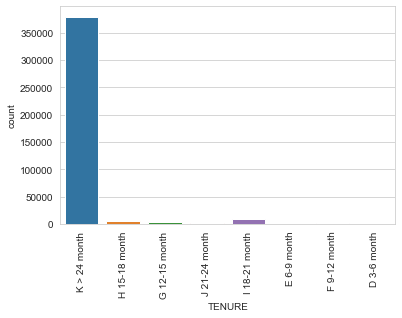

In [11]:
sns.countplot(x='TENURE',data = train)
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

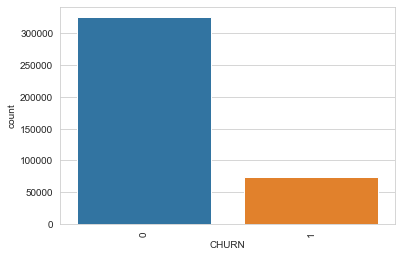

In [12]:
sns.countplot(x='CHURN',data = train)
plt.xticks(rotation = 90)

To visualize univariate(numeric)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250B4A80188>]],
      dtype=object)

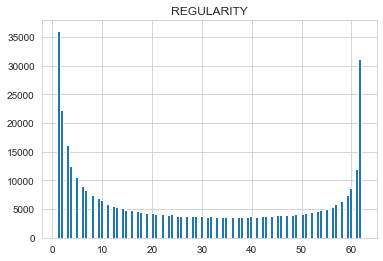

In [14]:
train.hist(column = 'REGULARITY',bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BA3A0F08>]],
      dtype=object)

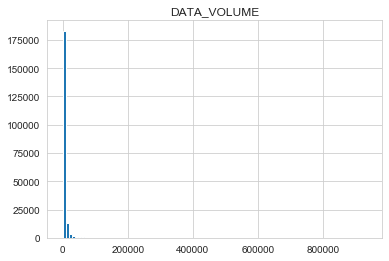

In [15]:
train.hist(column = 'DATA_VOLUME',bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BA46DF08>]],
      dtype=object)

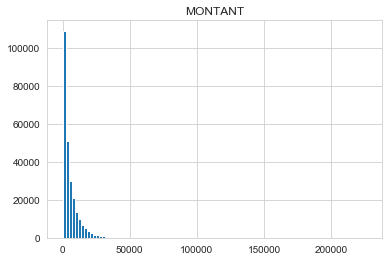

In [16]:
train.hist(column = 'MONTANT',bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BA54DD88>]],
      dtype=object)

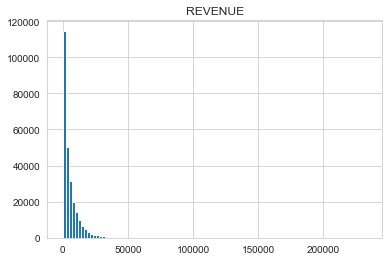

In [17]:
train.hist(column ='REVENUE',bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BADE65C8>]],
      dtype=object)

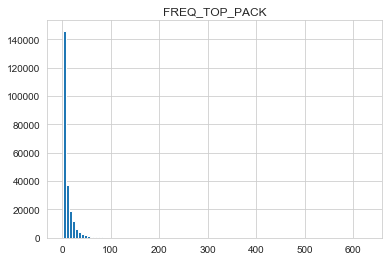

In [18]:
train.hist(column = 'FREQ_TOP_PACK',bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BA69F108>]],
      dtype=object)

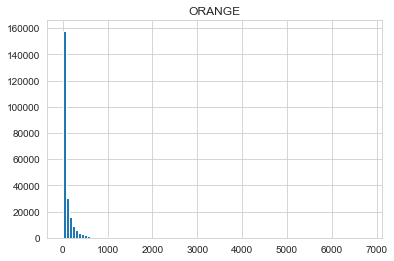

In [19]:
train.hist(column = 'ORANGE',bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BB014748>]],
      dtype=object)

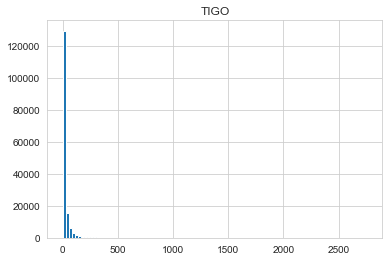

In [20]:
train.hist(column = 'TIGO',bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BACBED88>]],
      dtype=object)

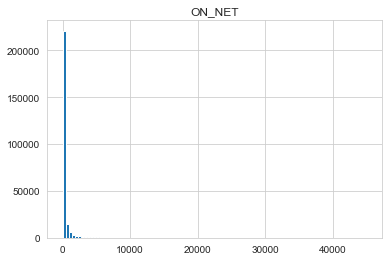

In [21]:
train.hist(column = 'ON_NET',bins =100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BABF79C8>]],
      dtype=object)

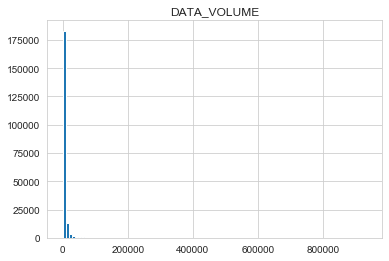

In [22]:
train.hist(column = 'DATA_VOLUME',bins =100)

In [139]:
#checking for total number of missing observation
train.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [141]:
#To get the percentage of missing values in each column
percent_missing = train.isnull().sum()*100/len(train)
print(percent_missing.round(2))

user_id            0.00
REGION            39.38
TENURE             0.00
MONTANT           35.07
FREQUENCE_RECH    35.07
REVENUE           33.67
ARPU_SEGMENT      33.67
FREQUENCE         33.67
DATA_VOLUME       49.21
ON_NET            36.45
ORANGE            41.58
TIGO              59.85
ZONE1             92.08
ZONE2             93.62
MRG                0.00
REGULARITY         0.00
TOP_PACK          41.83
FREQ_TOP_PACK     41.83
CHURN              0.00
dtype: float64


In [142]:
#Variables zone1 and Zone2 have 90% missing values ,it will be removed .MRG has the same value all,no variability,it will be removed.TENURE isnt informative and with low variance,it should be removed.

DEALING WITH MISSING VALUES IN NUMERIC FEATURES

In [112]:
mylist = ['MONTANT', 'FREQUENCE_RECH', 'ARPU_SEGMENT','REVENUE','FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY','FREQ_TOP_PACK']
#for i in mylist:
    #train[i] = train[i].fillna(-1,inplace=False)
    #test[i] = test[i].fillna(-1,inplace = False) or
for i in mylist:
    a=train[i].fillna(-1,inplace=True)
    b=test[i].fillna(-1,inplace = True)

In [113]:
train.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK          0
CHURN                  0
dtype: int64

filling in the missing value for the categorical variable

In [114]:
myylist =['REGION','TENURE','TOP_PACK']
for i in myylist:
    a = train.fillna('Not_Available',inplace= True)
    b = test.fillna('Not_Available',inplace = True)

In [115]:
train.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

**DATA VISUALIZATION CHECKING RELATIONSHIP BETWEEN TWO VARIABLES**

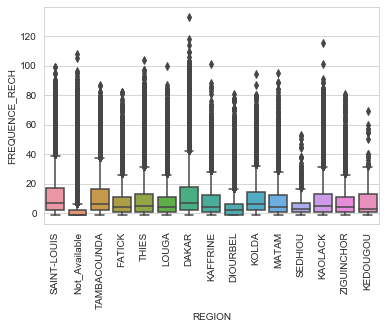

In [28]:
sns.boxplot(x= 'REGION',y='FREQUENCE_RECH',width =0.8,whis = 1.5,data =train)
plt.xticks(rotation = 90)
sns.set_context('notebook')

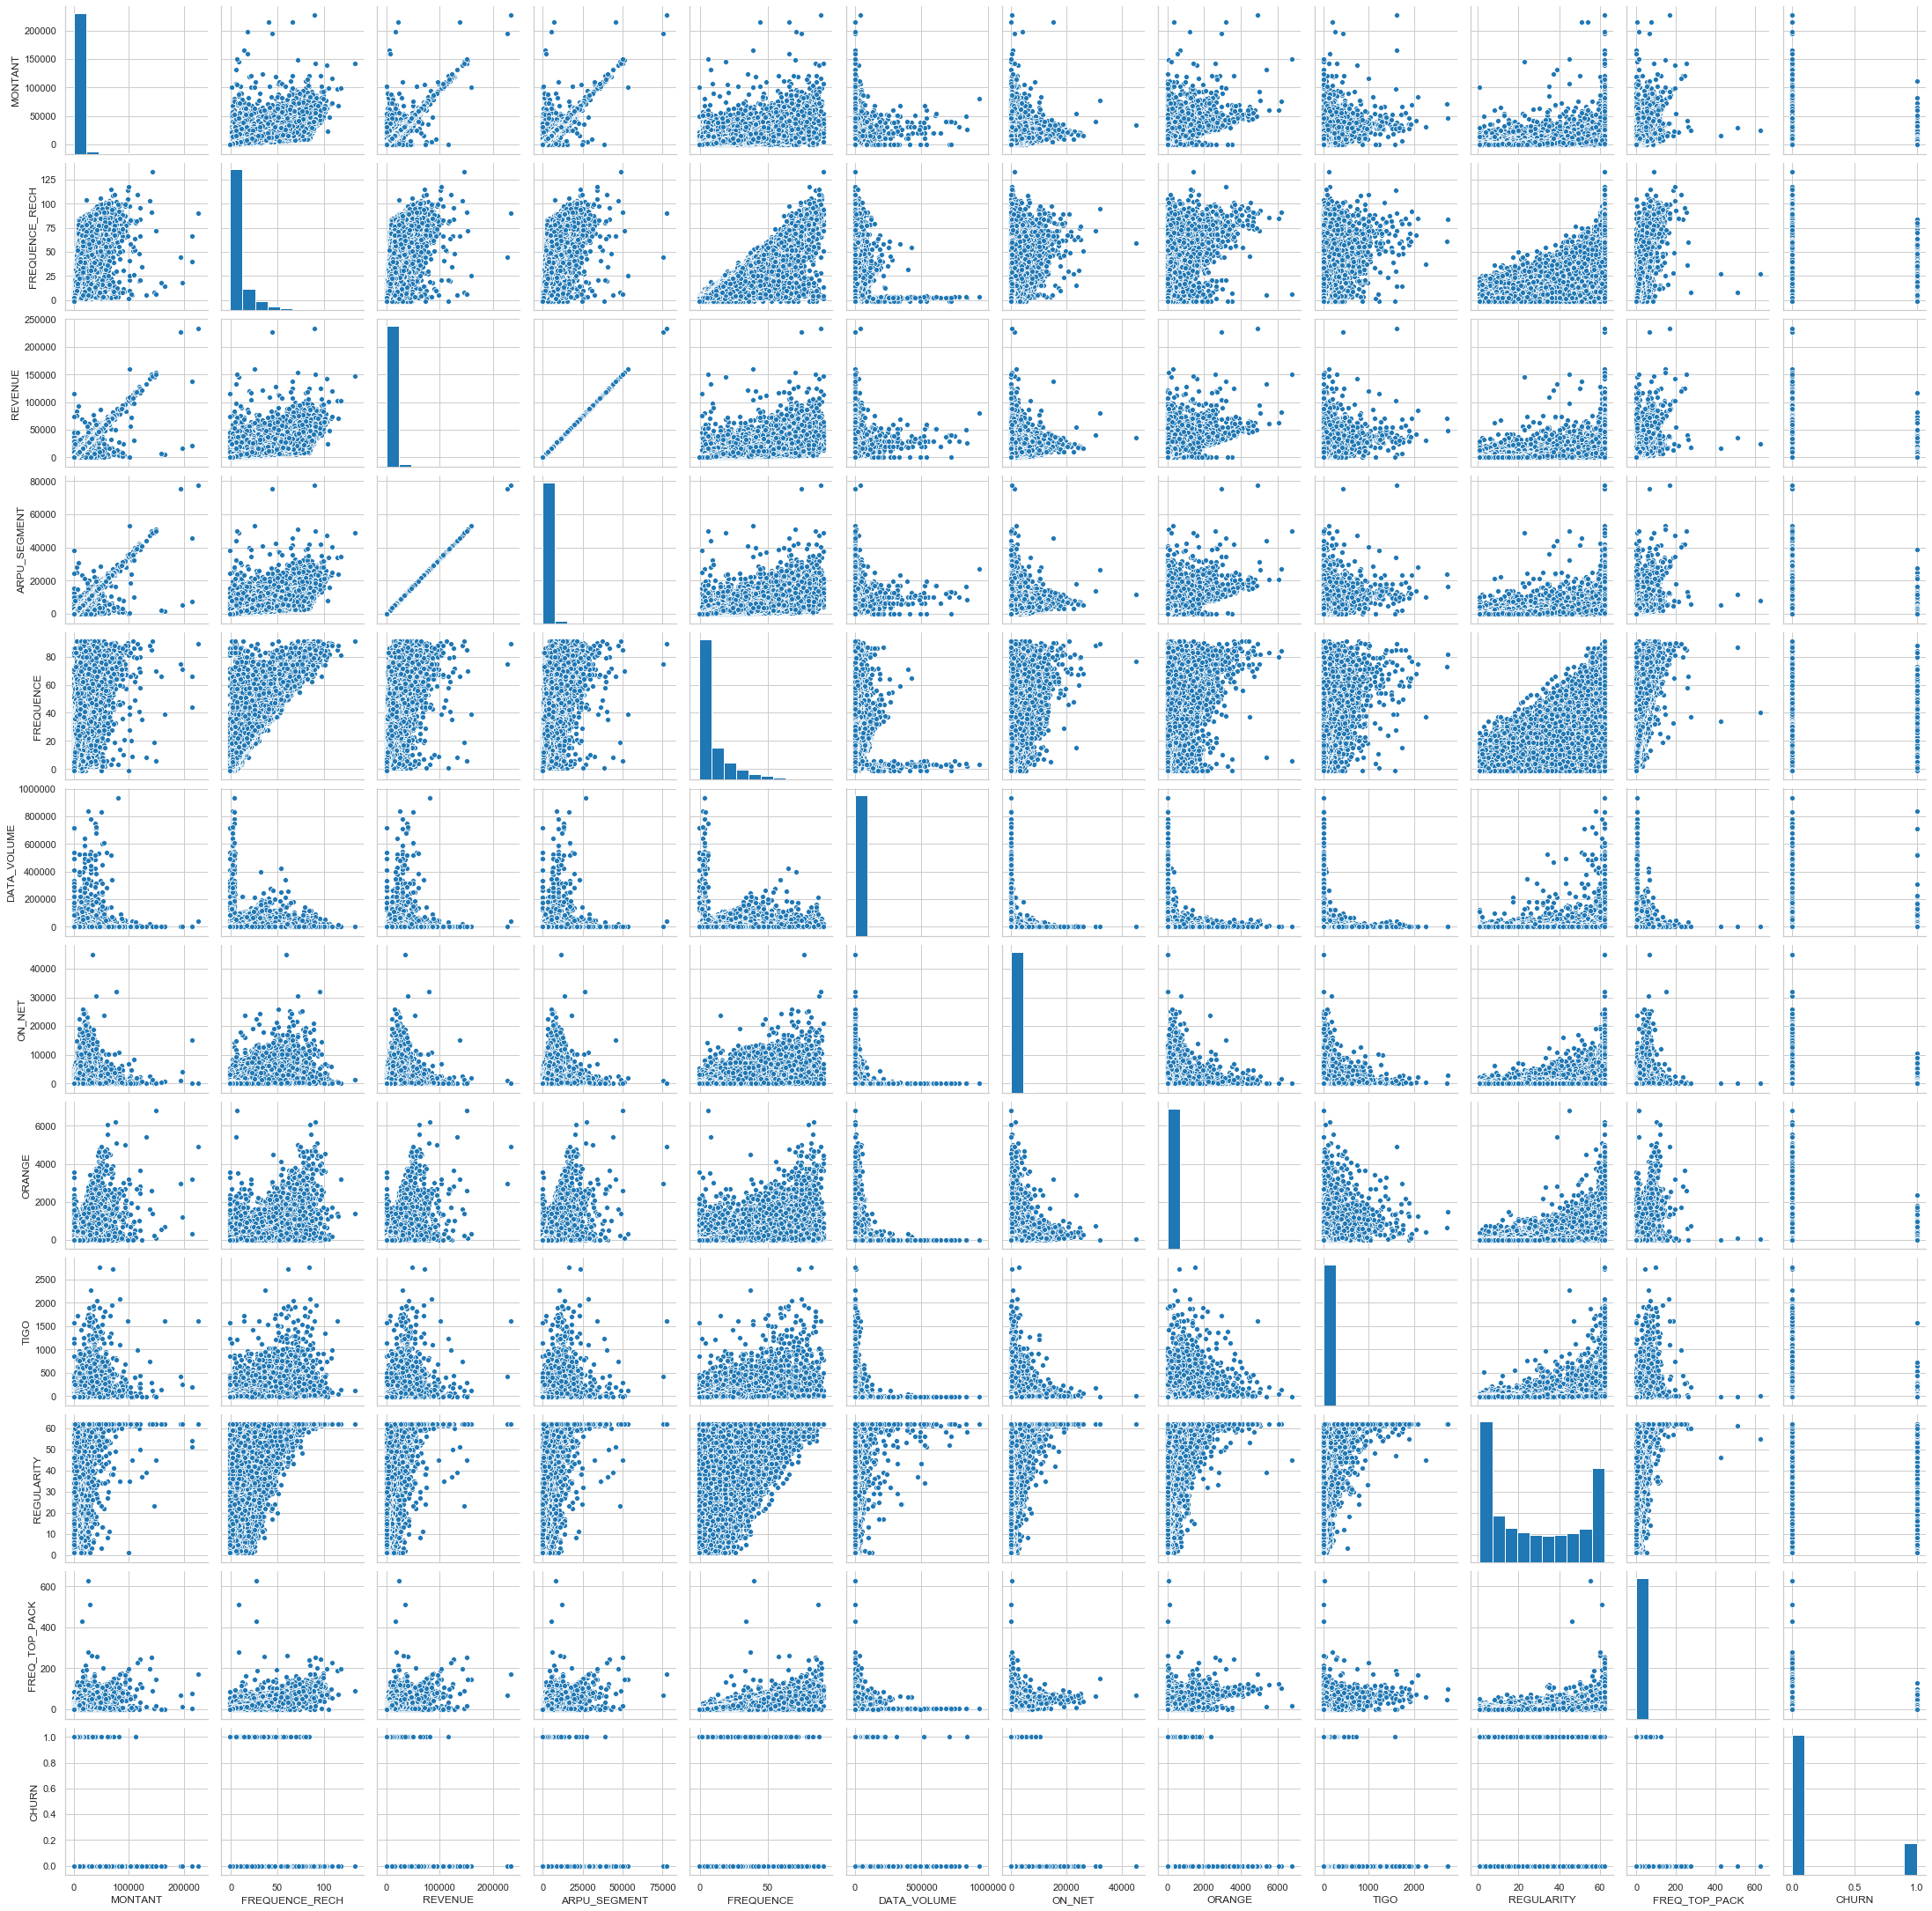

In [29]:
sns.pairplot(data =train)

In [144]:
#checking the correlation of the features with the label
train[train.columns[1:]].corr()['CHURN'][:]

MONTANT          -0.106229
FREQUENCE_RECH   -0.123113
REVENUE          -0.114822
ARPU_SEGMENT     -0.114822
FREQUENCE        -0.139685
DATA_VOLUME      -0.036015
ON_NET           -0.057701
ORANGE           -0.063382
TIGO             -0.035890
ZONE1             0.019937
ZONE2             0.000273
REGULARITY       -0.479120
FREQ_TOP_PACK    -0.085136
CHURN             1.000000
Name: CHURN, dtype: float64

In [31]:
train.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.838703,0.980870,0.980871,0.823779,0.287716,0.374437,0.688480,0.463924,0.603707,0.789409,-0.243801
FREQUENCE_RECH,0.838703,1.000000,0.844307,0.844326,0.965650,0.200800,0.437829,0.569119,0.396738,0.655198,0.892400,-0.281637
REVENUE,0.980870,0.844307,1.000000,1.000000,0.829532,0.295878,0.377112,0.692944,0.463691,0.608017,0.800439,-0.244581
ARPU_SEGMENT,0.980871,0.844326,1.000000,1.000000,0.829557,0.295879,0.377116,0.692938,0.463688,0.608074,0.800450,-0.244638
FREQUENCE,0.823779,0.965650,0.829532,0.829557,1.000000,0.215724,0.426672,0.531121,0.368255,0.687922,0.868188,-0.300766
DATA_VOLUME,0.287716,0.200800,0.295878,0.295879,0.215724,1.000000,0.011192,0.067833,0.045873,0.209640,0.171181,-0.073030
ON_NET,0.374437,0.437829,0.377112,0.377116,0.426672,0.011192,1.000000,0.268111,0.185083,0.300450,0.402673,-0.111816
ORANGE,0.688480,0.569119,0.692944,0.692938,0.531121,0.067833,0.268111,1.000000,0.455389,0.379963,0.602503,-0.153347
TIGO,0.463924,0.396738,0.463691,0.463688,0.368255,0.045873,0.185083,0.455389,1.000000,0.258939,0.415112,-0.102984
REGULARITY,0.603707,0.655198,0.608017,0.608074,0.687922,0.209640,0.300450,0.379963,0.258939,1.000000,0.567411,-0.479120


In [32]:
#train['TOP_PACK'].unique()

In [76]:
train.head()

,REGION,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,SAINT-LOUIS,17000.0,32.0,6000.0,34.0,-1.0,97.0,355.0,6.0,62,All-net 500F=2000F;5d,35.0
1,Not_Available,4300.0,29.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,"Data: 100 F=40MB,24H",22.0
2,TAMBACOUNDA,1500.0,3.0,500.0,3.0,-1.0,30.0,30.0,-1.0,32,All-net 500F=2000F;5d,3.0
3,FATICK,1500.0,3.0,832.0,4.0,0.0,159.0,45.0,19.0,18,On net 200F=Unlimited _call24H,3.0
4,FATICK,-1.0,-1.0,166.0,3.0,1.0,1.0,3.0,-1.0,50,Not_Available,-1.0


In [116]:
X = train.drop(['user_id','MRG','TENURE','REVENUE','ZONE1','ZONE2','CHURN'],axis =1)
X_test = test.drop(['user_id','MRG','TENURE','REVENUE','ZONE1','ZONE2'],axis =1)

In [117]:
y = train['CHURN']

Data Preprocessing
#encoding the categorical variables with LabelEncoder and OneHotEncoder

In [118]:
X.isnull().sum()

REGION            0
MONTANT           0
FREQUENCE_RECH    0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

In [90]:
#from sklearn.preprocessing import LabelEncoder
#for i in ['REGION','TOP_PACK']:
    #train[i] = LabelEncoder().fit_transform(train[i])
    #test[i] = LabelEncoder().fit_transform(test[i])

In [119]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
for i in ['REGION','TOP_PACK']:
    X[i] = OneHotEncoder().fit_transform(X[i].values.reshape(-1,1)).toarray()
    X_test[i] = OneHotEncoder().fit_transform(X_test[i].values.reshape(-1,1)).toarray()

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_vali,y_train,y_vali = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [123]:
#stratify y to ensure the target "CHURN" is evenly distributed in the train and validation sets

In [124]:
#scaling our dataset(preprocessing)

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [126]:
#from sklearn.pipeline import Pipeline this is 

In [129]:
pipe = Pipeline([('scaler',StandardScaler()),('model',LogisticRegression())])

In [130]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [131]:
prediction = pipe.predict(X_vali)

In [132]:
from sklearn.metrics import log_loss, accuracy_score

score = accuracy_score(y_vali,prediction)
print('Accuracy on validation set:', score)

Accuracy on validation set: 0.8637375


**MAKING PREDICTION AND SAVE TO A SUBMISSION FILE**

In [145]:
pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [146]:
pred = pipe.predict_proba(X_test)[:,1]

In [147]:
pd.DataFrame({'user_id':test['user_id'],'CHURN':pred}).to_csv('starter-submission.csv',index =False)